# **Implement Image compression using wavelets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
from google.colab.patches import cv2_imshow

In [ ]:
def img_compression(image, n, w):
  s = os.stat("/content/drive/MyDrive/tree_gray.png").st_size
  print("Original Image\n" + "Size in Bytes: " + str(s) )
  cv2_imshow(image)

  # 2-D Wavelet decomposition in pywavelets package.
  coeffs = pywt.wavedec2(image, wavelet = w, level = n)

  coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
  Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

  size = []
  compressed_img = []
  for keep in (0.08,0.1,0.25,0.5,0.9):
    thresh = Csort[int(np.floor((keep)*len(Csort)))]
    ind = np.abs(coeff_arr)>thresh
    Cfilt = coeff_arr*ind
    coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format="wavedec2")
    Arecon = pywt.waverec2(coeffs_filt, wavelet =w)  # Reconstruct the original image
    cv2.imwrite("/content/drive/MyDrive/compressed/tree"+str(keep)+".png", Arecon.astype("uint8"))
  for filename in glob.glob("/content/drive/MyDrive/compressed/*.png"):
    size.append(os.stat(filename).st_size)
    n = cv2.imread(filename)
    compressed_img.append(n)

  plt.figure(figsize =(15,15))


  plt.subplot(3,3,1)
  ratio=np.round(s/size[0],2)
  plt.title(( "\n Threshold 0.08\n" + "Size in Bytes: "+str(size[0])+"KB"+ "\nCompression ratio : "+str(ratio)+" :1" ))
  plt.imshow(compressed_img[0])

  plt.subplot(3,3,2)
  ratio=np.round(s/size[1],2)
  plt.imshow(compressed_img[1])
  plt.title(( "Threshold 0.1\n" +"Size in Bytes: " + str(size[1])+"KB"+ "\nCompression ratio : "+str(ratio)+" :1"))

  plt.subplot(3,3,3)
  ratio=np.round(s/size[2],2)
  plt.title(("\n\nThreshold 0.25\n" +"Size in Bytes: " +str(size[2])+"KB"+ "\nCompression ratio : "+str(ratio)+" :1"))
  plt.imshow(compressed_img[2])

  plt.subplot(3,3,4)
  ratio=np.round(s/size[3],2)
  plt.title(("\n\nThreshold 0.5\n" +"Size in Bytes: " +str(size[3])+"KB"+ "\nCompression ratio : "+str(ratio)+" :1"))
  plt.imshow(compressed_img[3])

  plt.subplot(3,3,5)
  ratio=np.round(s/size[4],2)
  plt.title(("\n\nThreshold 0.9 \n" +"Size in Bytes: " +str(size[4])+"KB"+ "\nCompression ratio : "+str(ratio)+" :1"))
  plt.imshow(compressed_img[4])


  plt.tight_layout()
  plt.show()


Original Image
Size in Bytes: 44606


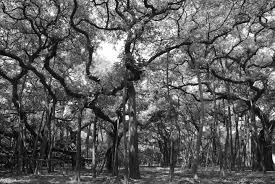

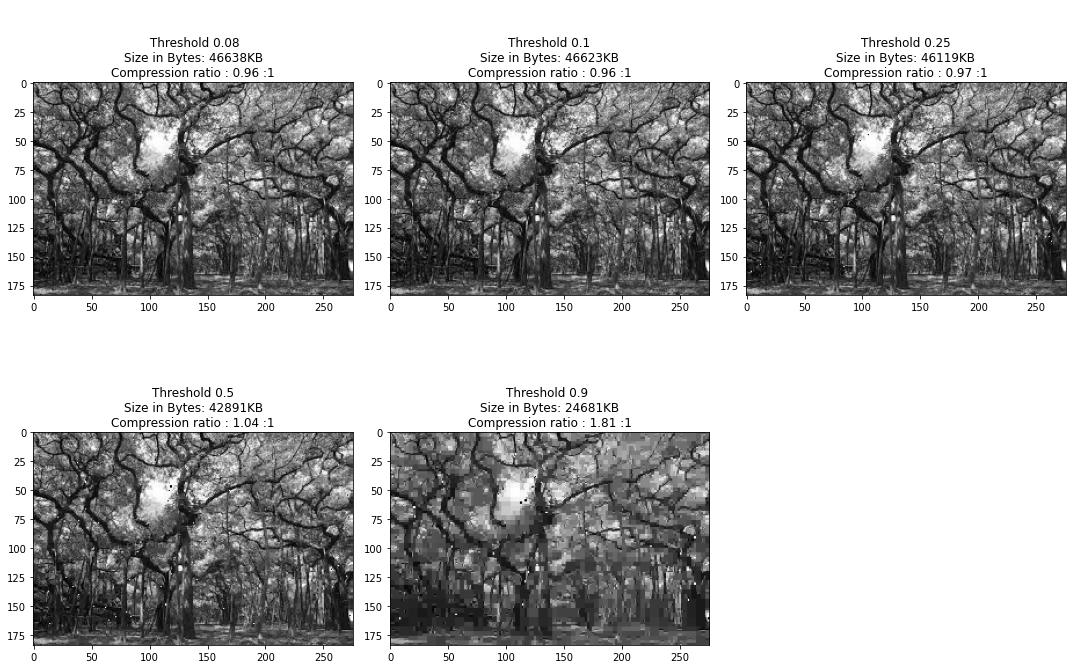

In [ ]:
image=cv2.imread('/content/drive/MyDrive/images.png',0)
img_compression(image,4,'db1')